<a href="https://colab.research.google.com/github/darapanenichandana/my-app/blob/main/slab1(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              40000 non-null  int64  
 1   Timestamp               40000 non-null  object 
 2   Source IP Address       40000 non-null  object 
 3   Destination IP Address  40000 non-null  object 
 4   Source Port             40000 non-null  int64  
 5   Destination Port        40000 non-null  int64  
 6   Protocol                40000 non-null  object 
 7   Packet Length           40000 non-null  int64  
 8   Packet Type             40000 non-null  object 
 9   Traffic Type            40000 non-null  object 
 10  Payload Data            40000 non-null  object 
 11  Malware Indicators      40000 non-null  object 
 12  Anomaly Scores          40000 non-null  float64
 13  Alerts/Warnings         40000 non-null  object 
 14  Attack Type         

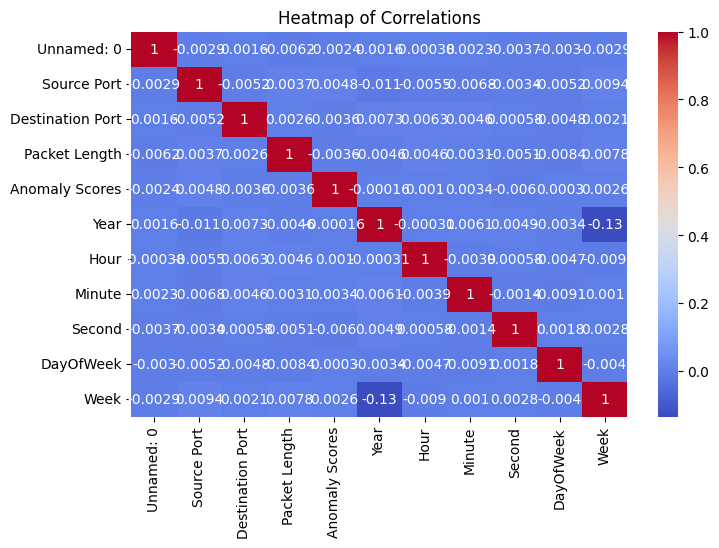


Above heatmap visualizes relationships between numerical columns, helping to identify correlations in attack patterns.


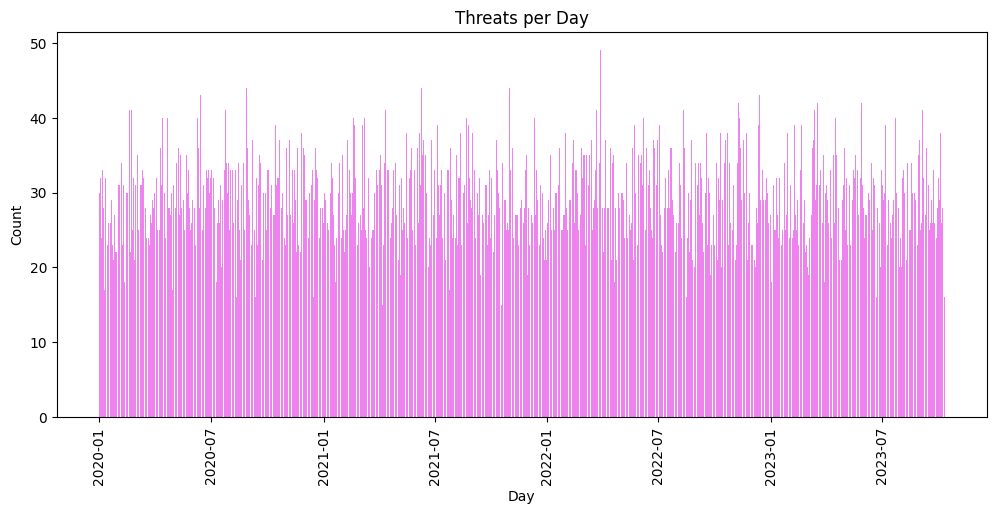


Above  bar chart represents the number of threats detected each day, highlighting periods of increased attack activity.


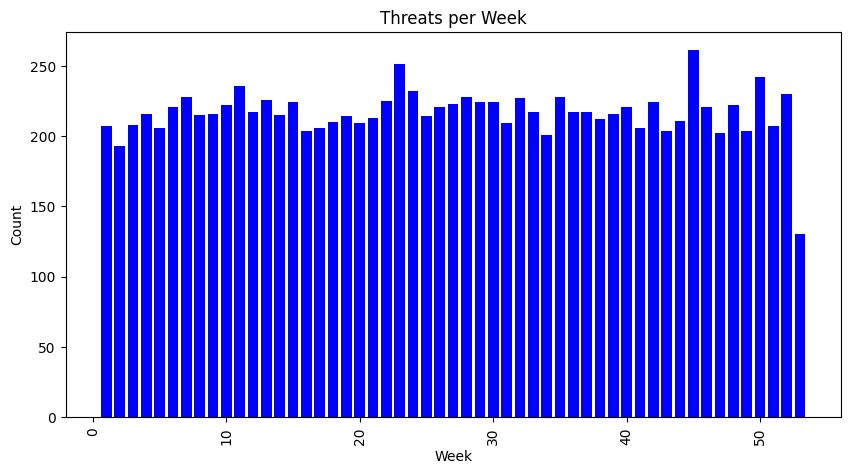


Above chart shows the number of threats recorded each week, useful for detecting recurring attack trends.


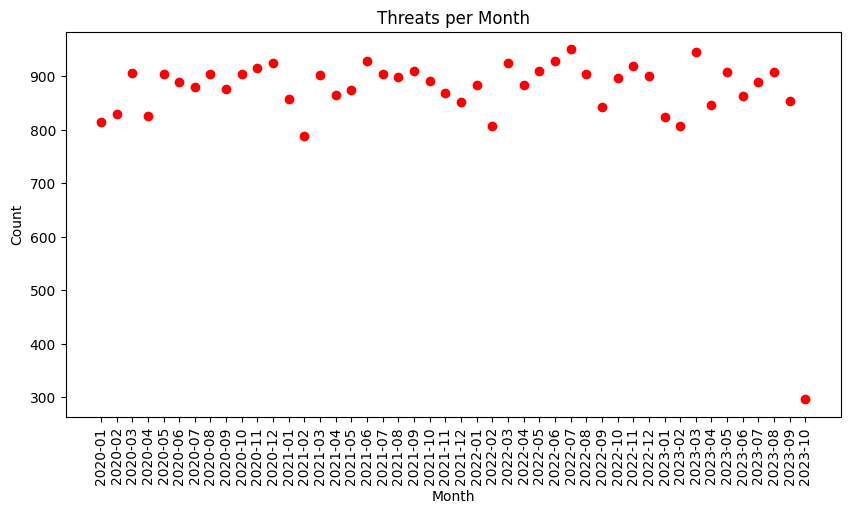


Above scatter plot tracks cybersecurity threats over months, helping observe seasonal variations.


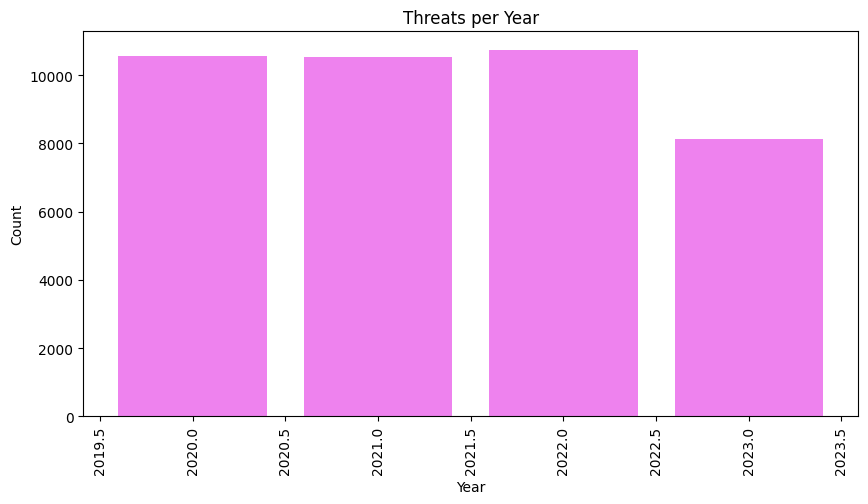


Above bar chart illustrates yearly attack trends, helping assess long-term threat patterns.



Above graph compares weekly threats across years, highlighting peak attack periods.



Above chart displays the most common traffic types, indicating attack methods or normal network behavior.



Above graph shows the most frequent attack types, helping prioritize security responses.



Above pie chart illustrates the severity levels of recorded attacks, indicating high-risk threats.



Above chart highlights the top 10 regions experiencing the most attacks, helping target security improvements.


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


df = pd.read_csv("/content/updated_cybersecurity_attacks.csv.zip")


print("Dataset Overview:")
print(df.info())
print(df.head())


print("\nBasic Statistical Summary:")
print(df.describe())


if 'Packet Length' in df.columns:
    avg_packet_length = df['Packet Length'].mean()
    print(f"\nAverage Packet Length: {avg_packet_length}")


if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Day'] = df['Timestamp'].dt.date
    df['Week'] = df['Timestamp'].dt.isocalendar().week
    df['Month'] = df['Timestamp'].dt.strftime('%Y-%m')
    df['Year'] = df['Timestamp'].dt.year


    daily_threats = df.groupby('Day').size().reset_index(name='Count')
    weekly_threats = df.groupby(['Year', 'Week']).size().reset_index(name='Count')
    monthly_threats = df.groupby('Month').size().reset_index(name='Count')
    yearly_threats = df.groupby('Year').size().reset_index(name='Count')

    plt.figure(figsize=(8, 5))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
    plt.title("Heatmap of Correlations")
    plt.show()
    print("\nAbove heatmap visualizes relationships between numerical columns, helping to identify correlations in attack patterns.")


    plt.figure(figsize=(12, 5))
    plt.bar(daily_threats['Day'], daily_threats['Count'], color='violet')
    plt.xticks(rotation=90)
    plt.title("Threats per Day")
    plt.xlabel("Day")
    plt.ylabel("Count")
    plt.show()
    print("\nAbove  bar chart represents the number of threats detected each day, highlighting periods of increased attack activity.")

    plt.figure(figsize=(10, 5))
    plt.bar(weekly_threats['Week'], weekly_threats['Count'], color='blue')
    plt.xticks(rotation=90)
    plt.title("Threats per Week")
    plt.xlabel("Week")
    plt.ylabel("Count")
    plt.show()
    print("\nAbove chart shows the number of threats recorded each week, useful for detecting recurring attack trends.")


    plt.figure(figsize=(10, 5))
    plt.scatter(monthly_threats['Month'], monthly_threats['Count'], color='red')
    plt.xticks(rotation=90)
    plt.title("Threats per Month")
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.show()
    print("\nAbove scatter plot tracks cybersecurity threats over months, helping observe seasonal variations.")


    plt.figure(figsize=(10, 5))
    plt.bar(yearly_threats['Year'], yearly_threats['Count'], color='violet')
    plt.xticks(rotation=90)
    plt.title("Threats per Year")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.show()
    print("\nAbove bar chart illustrates yearly attack trends, helping assess long-term threat patterns.")


    weekly_threats = df.groupby(['Year', 'Week']).size().reset_index(name='Count')


    fig_weekly = px.bar(weekly_threats, x='Week', y='Count', color='Year', title='Threats per Week per Year')
    fig_weekly.show()
    print("\nAbove graph compares weekly threats across years, highlighting peak attack periods.")


if 'Traffic Type' in df.columns:
    traffic_type_counts = df['Traffic Type'].value_counts().reset_index()
    traffic_type_counts.columns = ['Traffic Type', 'Count']
    fig_traffic = px.bar(traffic_type_counts, x='Traffic Type', y='Count', title='Top Traffic Types', color='Traffic Type')
    fig_traffic.show()
    print("\nAbove chart displays the most common traffic types, indicating attack methods or normal network behavior.")


if 'Attack Type' in df.columns:
    attack_type_counts = df['Attack Type'].value_counts().reset_index()
    attack_type_counts.columns = ['Attack Type', 'Count']
    fig_attack = px.bar(attack_type_counts, x='Attack Type', y='Count', title='Top Attack Types', color='Attack Type')
    fig_attack.show()
    print("\nAbove graph shows the most frequent attack types, helping prioritize security responses.")


if 'Severity Level' in df.columns:
    severity_counts = df['Severity Level'].value_counts().reset_index()
    severity_counts.columns = ['Severity Level', 'Count']
    fig_severity = px.pie(severity_counts, values='Count', names='Severity Level', title='Severity Level Distribution')
    fig_severity.show()
    print("\nAbove pie chart illustrates the severity levels of recorded attacks, indicating high-risk threats.")


if 'Geo-location Data' in df.columns:
    geo_counts = df['Geo-location Data'].value_counts().reset_index().head(10)
    geo_counts.columns = ['Geo-location Data', 'Count']
    fig_geo = px.bar(geo_counts, x='Geo-location Data', y='Count', title='Top 10 Attack Locations', color='Geo-location Data')
    fig_geo.show()
    print("\nAbove chart highlights the top 10 regions experiencing the most attacks, helping target security improvements.")
